<a href="https://colab.research.google.com/github/hatalsky/Python_Class_DATA201/blob/main/Python_Project_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
#read the data in and getting to know it
df = pd.read_csv('https://raw.githubusercontent.com/niteen11/DataAnalyticsAcademy/master/Python/dataset_diabetes/diabetic_data.csv')
df.head(15)

,encounter_id,patient_nbr,race,gender,age,weight,admission_type_id,discharge_disposition_id,admission_source_id,time_in_hospital,...,citoglipton,insulin,glyburide-metformin,glipizide-metformin,glimepiride-pioglitazone,metformin-rosiglitazone,metformin-pioglitazone,change,diabetesMed,readmitted
0,2278392,8222157,Caucasian,Female,[0-10),?,6,25,1,1,...,No,No,No,No,No,No,No,No,No,NO
1,149190,55629189,Caucasian,Female,[10-20),?,1,1,7,3,...,No,Up,No,No,No,No,No,Ch,Yes,>30
2,64410,86047875,AfricanAmerican,Female,[20-30),?,1,1,7,2,...,No,No,No,No,No,No,No,No,Yes,NO
3,500364,82442376,Caucasian,Male,[30-40),?,1,1,7,2,...,No,Up,No,No,No,No,No,Ch,Yes,NO
4,16680,42519267,Caucasian,Male,[40-50),?,1,1,7,1,...,No,Steady,No,No,No,No,No,Ch,Yes,NO
5,35754,82637451,Caucasian,Male,[50-60),?,2,1,2,3,...,No,Steady,No,No,No,No,No,No,Yes,>30
6,55842,84259809,Caucasian,Male,[60-70),?,3,1,2,4,...,No,Steady,No,No,No,No,No,Ch,Yes,NO
7,63768,114882984,Caucasian,Male,[70-80),?,1,1,7,5,...,No,No,No,No,No,No,No,No,Yes,>30
8,12522,48330783,Caucasian,Female,[80-90),?,2,1,4,13,...,No,Steady,No,No,No,No,No,Ch,Yes,NO
9,15738,63555939,Caucasian,Female,[90-100),?,3,3,4,12,...,No,Steady,No,No,No,No,No,Ch,Yes,NO


In [3]:
df.shape

(101766, 50)

In [4]:
df.columns

Index(['encounter_id', 'patient_nbr', 'race', 'gender', 'age', 'weight',
       'admission_type_id', 'discharge_disposition_id', 'admission_source_id',
       'time_in_hospital', 'payer_code', 'medical_specialty',
       'num_lab_procedures', 'num_procedures', 'num_medications',
       'number_outpatient', 'number_emergency', 'number_inpatient', 'diag_1',
       'diag_2', 'diag_3', 'number_diagnoses', 'max_glu_serum', 'A1Cresult',
       'metformin', 'repaglinide', 'nateglinide', 'chlorpropamide',
       'glimepiride', 'acetohexamide', 'glipizide', 'glyburide', 'tolbutamide',
       'pioglitazone', 'rosiglitazone', 'acarbose', 'miglitol', 'troglitazone',
       'tolazamide', 'examide', 'citoglipton', 'insulin',
       'glyburide-metformin', 'glipizide-metformin',
       'glimepiride-pioglitazone', 'metformin-rosiglitazone',
       'metformin-pioglitazone', 'change', 'diabetesMed', 'readmitted'],
      dtype='object')

In [5]:
#dropping columns on individiual drugs + we have a few columns where there are integer identifiers, but they are not further defined in the data dictionary. W/o this context, the columns are pretty useless and can be dropped
drop_cols = ['admission_type_id', 'discharge_disposition_id', 'admission_source_id', 'payer_code', 'medical_specialty', 'diag_1','diag_2', 'diag_3','metformin', 'repaglinide', 'nateglinide', 'chlorpropamide',       'glimepiride', 'acetohexamide', 'glipizide', 'glyburide', 'tolbutamide',
       'pioglitazone', 'rosiglitazone', 'acarbose', 'miglitol', 'troglitazone','tolazamide', 'examide', 'citoglipton', 'insulin','glyburide-metformin', 'glipizide-metformin','glimepiride-pioglitazone', 'metformin-rosiglitazone',      'metformin-pioglitazone']
df.drop(drop_cols, inplace = True, axis=1)


In [6]:
df.head()

,encounter_id,patient_nbr,race,gender,age,weight,time_in_hospital,num_lab_procedures,num_procedures,num_medications,number_outpatient,number_emergency,number_inpatient,number_diagnoses,max_glu_serum,A1Cresult,change,diabetesMed,readmitted
0,2278392,8222157,Caucasian,Female,[0-10),?,1,41,0,1,0,0,0,1,None,None,No,No,NO
1,149190,55629189,Caucasian,Female,[10-20),?,3,59,0,18,0,0,0,9,None,None,Ch,Yes,>30
2,64410,86047875,AfricanAmerican,Female,[20-30),?,2,11,5,13,2,0,1,6,None,None,No,Yes,NO
3,500364,82442376,Caucasian,Male,[30-40),?,2,44,1,16,0,0,0,7,None,None,Ch,Yes,NO
4,16680,42519267,Caucasian,Male,[40-50),?,1,51,0,8,0,0,0,5,None,None,Ch,Yes,NO


In [7]:
df.shape

(101766, 19)

dataset is now down to 19 columns rather than 50.

In [8]:
#checking for standard missing values
df.isnull().sum()

encounter_id          0
patient_nbr           0
race                  0
gender                0
age                   0
weight                0
time_in_hospital      0
num_lab_procedures    0
num_procedures        0
num_medications       0
number_outpatient     0
number_emergency      0
number_inpatient      0
number_diagnoses      0
max_glu_serum         0
A1Cresult             0
change                0
diabetesMed           0
readmitted            0
dtype: int64

In [9]:
#examining remaining columns for non standard missing data
df.race.unique()

array(['Caucasian', 'AfricanAmerican', '?', 'Other', 'Asian', 'Hispanic'],
      dtype=object)

In [10]:
df.gender.unique()

array(['Female', 'Male', 'Unknown/Invalid'], dtype=object)

In [11]:
#thought that 'unknown/invalid' was interesting - just wanted to see if there was a noticeable number of observations with gender confusion
df.groupby(['gender'])['encounter_id'].count()

gender
Female             54708
Male               47055
Unknown/Invalid        3
Name: encounter_id, dtype: int64

In [12]:
df.age.unique()

array(['[0-10)', '[10-20)', '[20-30)', '[30-40)', '[40-50)', '[50-60)',
       '[60-70)', '[70-80)', '[80-90)', '[90-100)'], dtype=object)

In [13]:
df.weight.unique()

array(['?', '[75-100)', '[50-75)', '[0-25)', '[100-125)', '[25-50)',
       '[125-150)', '[175-200)', '[150-175)', '>200'], dtype=object)

In [14]:
df.time_in_hospital.unique()

array([ 1,  3,  2,  4,  5, 13, 12,  9,  7, 10,  6, 11,  8, 14])

In [15]:
df.num_lab_procedures.unique()

array([ 41,  59,  11,  44,  51,  31,  70,  73,  68,  33,  47,  62,  60,
        55,  49,  75,  45,  29,  35,  42,  66,  36,  19,  64,  25,  53,
        52,  87,  27,  37,  46,  28,  48,  72,  10,   2,  65,  67,  40,
        54,  58,  57,  43,  32,  83,  34,  39,  69,  38,  56,  22,  96,
        78,  61,  88,  50,   1,  18,  82,   9,  63,  24,  71,  77,  81,
        76,  90,  93,   3, 103,  13,  80,  85,  16,  15,  12,  30,  23,
        17,  21,  79,  26,   5,  95,  97,  84,  14,  74, 105,  86,  98,
        20,   6,  94,   8, 102, 100,   7,  89,  91,  92,   4, 101,  99,
       114, 113, 111, 129, 107, 108, 106, 104, 109, 120, 132, 121, 126,
       118])

In [16]:
df.num_procedures.unique()

array([0, 5, 1, 6, 2, 3, 4])

In [17]:
df.num_medications.unique()

array([ 1, 18, 13, 16,  8, 21, 12, 28, 17, 11, 15, 31,  2, 23, 19,  7, 20,
       14, 10, 22,  9, 27, 25,  4, 32,  6, 30, 26, 24, 33,  5, 39,  3, 29,
       61, 40, 46, 41, 36, 34, 35, 50, 43, 42, 37, 51, 38, 45, 54, 52, 49,
       62, 55, 47, 44, 53, 48, 57, 59, 56, 60, 63, 58, 70, 67, 64, 69, 65,
       68, 66, 81, 79, 75, 72, 74])

In [18]:
df.number_outpatient.unique()

array([ 0,  2,  1,  5,  7,  9,  3,  8,  4, 12, 11,  6, 20, 15, 10, 13, 14,
       16, 21, 35, 17, 29, 36, 18, 19, 27, 22, 24, 42, 39, 34, 26, 33, 25,
       23, 28, 37, 38, 40])

In [19]:
df.number_emergency.unique()

array([ 0,  1,  2,  4,  3,  9,  5,  7,  6,  8, 22, 25, 10, 13, 42, 16, 11,
       28, 15, 14, 18, 12, 21, 20, 19, 46, 76, 37, 64, 63, 54, 24, 29])

In [20]:
df.number_inpatient.unique()

array([ 0,  1,  2,  3,  6,  5,  4,  7,  8,  9, 15, 10, 11, 14, 12, 13, 17,
       16, 21, 18, 19])

In [21]:
df.number_diagnoses.unique()

array([ 1,  9,  6,  7,  5,  8,  3,  4,  2, 16, 12, 13, 15, 10, 11, 14])

In [22]:
df.max_glu_serum.unique()

array(['None', '>300', 'Norm', '>200'], dtype=object)

In [23]:
df.A1Cresult.unique()

array(['None', '>7', '>8', 'Norm'], dtype=object)

In [24]:
df.change.unique()

array(['No', 'Ch'], dtype=object)

In [25]:
df.diabetesMed.unique()

array(['No', 'Yes'], dtype=object)

In [26]:
df.readmitted.unique()

array(['NO', '>30', '<30'], dtype=object)

In [27]:
#only identified one non-standard missing value ("?"). imputing to NaN
missing_values = ["?"]
df2 = pd.read_csv('https://raw.githubusercontent.com/niteen11/DataAnalyticsAcademy/master/Python/dataset_diabetes/diabetic_data.csv', na_values = missing_values)
df2.head()

<ipython-input-27-65da9291e3a5>:3: DtypeWarning: Columns (10) have mixed types. Specify dtype option on import or set low_memory=False.
  df2 = pd.read_csv('https://raw.githubusercontent.com/niteen11/DataAnalyticsAcademy/master/Python/dataset_diabetes/diabetic_data.csv', na_values = missing_values)


,encounter_id,patient_nbr,race,gender,age,weight,admission_type_id,discharge_disposition_id,admission_source_id,time_in_hospital,...,citoglipton,insulin,glyburide-metformin,glipizide-metformin,glimepiride-pioglitazone,metformin-rosiglitazone,metformin-pioglitazone,change,diabetesMed,readmitted
0,2278392,8222157,Caucasian,Female,[0-10),NaN,6,25,1,1,...,No,No,No,No,No,No,No,No,No,NO
1,149190,55629189,Caucasian,Female,[10-20),NaN,1,1,7,3,...,No,Up,No,No,No,No,No,Ch,Yes,>30
2,64410,86047875,AfricanAmerican,Female,[20-30),NaN,1,1,7,2,...,No,No,No,No,No,No,No,No,Yes,NO
3,500364,82442376,Caucasian,Male,[30-40),NaN,1,1,7,2,...,No,Up,No,No,No,No,No,Ch,Yes,NO
4,16680,42519267,Caucasian,Male,[40-50),NaN,1,1,7,1,...,No,Steady,No,No,No,No,No,Ch,Yes,NO


In [28]:
#dropping columns from new/cleaned dataframe (df2) that we also dropped from df
drop_cols = ['admission_type_id', 'discharge_disposition_id', 'admission_source_id', 'payer_code', 'medical_specialty', 'diag_1','diag_2', 'diag_3','metformin', 'repaglinide', 'nateglinide', 'chlorpropamide',       'glimepiride', 'acetohexamide', 'glipizide', 'glyburide', 'tolbutamide',
       'pioglitazone', 'rosiglitazone', 'acarbose', 'miglitol', 'troglitazone','tolazamide', 'examide', 'citoglipton', 'insulin','glyburide-metformin', 'glipizide-metformin','glimepiride-pioglitazone', 'metformin-rosiglitazone',      'metformin-pioglitazone']
df2.drop(drop_cols, inplace = True, axis=1)

In [29]:
df2.head(10)

,encounter_id,patient_nbr,race,gender,age,weight,time_in_hospital,num_lab_procedures,num_procedures,num_medications,number_outpatient,number_emergency,number_inpatient,number_diagnoses,max_glu_serum,A1Cresult,change,diabetesMed,readmitted
0,2278392,8222157,Caucasian,Female,[0-10),NaN,1,41,0,1,0,0,0,1,None,None,No,No,NO
1,149190,55629189,Caucasian,Female,[10-20),NaN,3,59,0,18,0,0,0,9,None,None,Ch,Yes,>30
2,64410,86047875,AfricanAmerican,Female,[20-30),NaN,2,11,5,13,2,0,1,6,None,None,No,Yes,NO
3,500364,82442376,Caucasian,Male,[30-40),NaN,2,44,1,16,0,0,0,7,None,None,Ch,Yes,NO
4,16680,42519267,Caucasian,Male,[40-50),NaN,1,51,0,8,0,0,0,5,None,None,Ch,Yes,NO
5,35754,82637451,Caucasian,Male,[50-60),NaN,3,31,6,16,0,0,0,9,None,None,No,Yes,>30
6,55842,84259809,Caucasian,Male,[60-70),NaN,4,70,1,21,0,0,0,7,None,None,Ch,Yes,NO
7,63768,114882984,Caucasian,Male,[70-80),NaN,5,73,0,12,0,0,0,8,None,None,No,Yes,>30
8,12522,48330783,Caucasian,Female,[80-90),NaN,13,68,2,28,0,0,0,8,None,None,Ch,Yes,NO
9,15738,63555939,Caucasian,Female,[90-100),NaN,12,33,3,18,0,0,0,8,None,None,Ch,Yes,NO


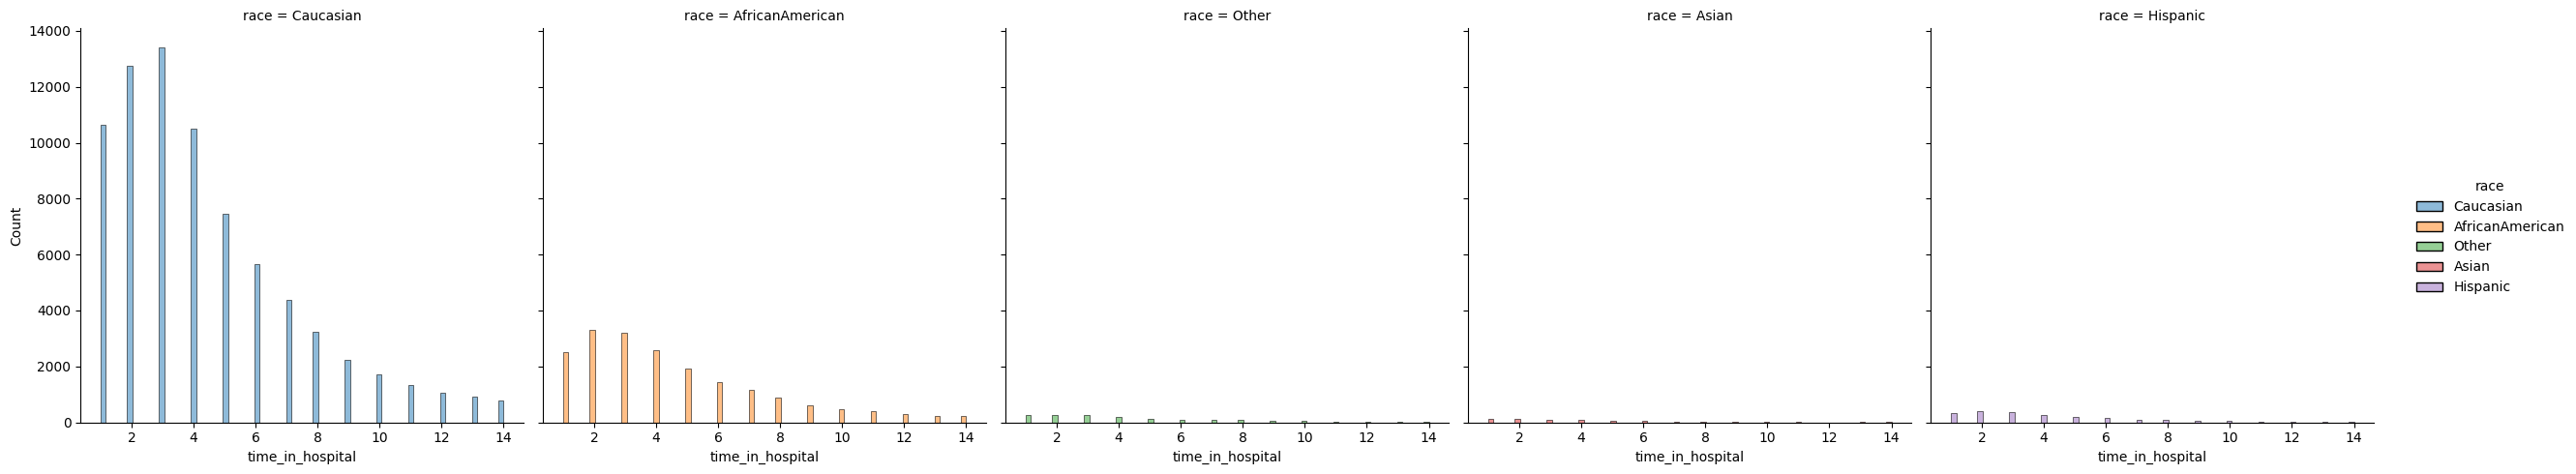

In [30]:
#getting a sense of the distributions of care indicators with the entire dataset grouped by race
sns.displot(data=df2, x="time_in_hospital", col="race", hue="race")

<Axes: xlabel='time_in_hospital', ylabel='race'>

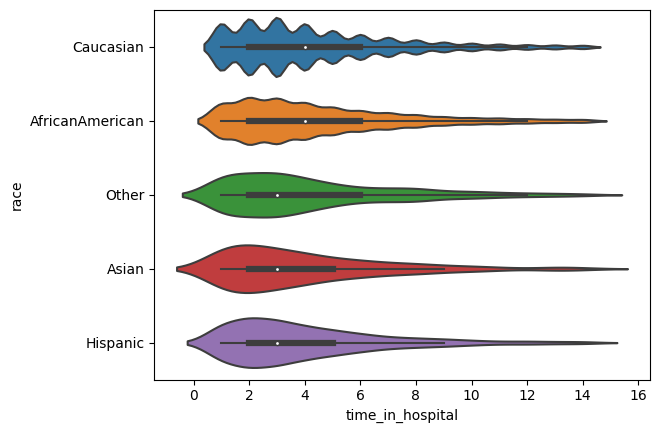

In [31]:
#distribution plot doesn't provide a good visual across race because of lower counts of BIPOC patients - trying violin plot instead
sns.violinplot(x="time_in_hospital", y="race", data=df2)

Violin plot provides better visual for sake of comparison across racial groups

<Axes: xlabel='num_lab_procedures', ylabel='race'>

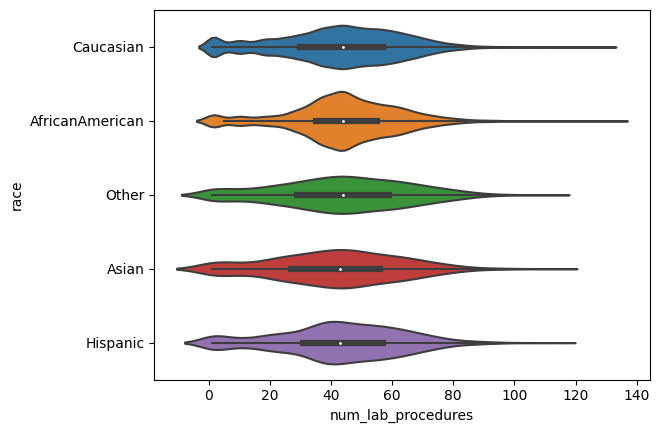

In [32]:
sns.violinplot(x="num_lab_procedures", y="race", data=df2)

<Axes: xlabel='num_procedures', ylabel='race'>

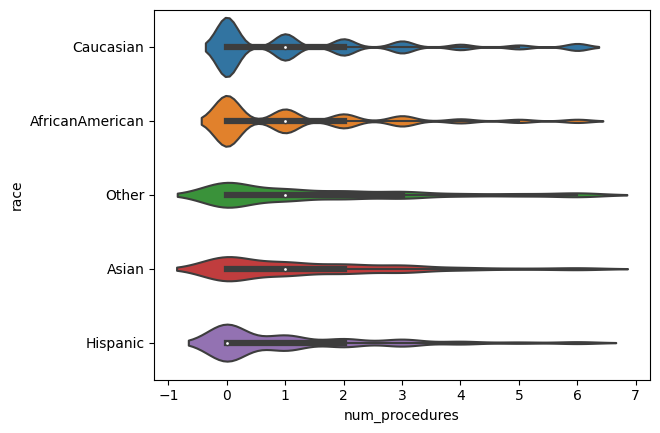

In [33]:
sns.violinplot(x="num_procedures", y="race", data=df2)

<Axes: xlabel='num_medications', ylabel='race'>

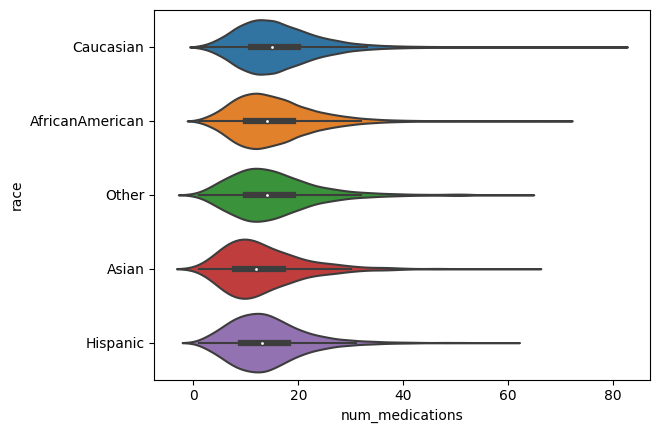

In [34]:
sns.violinplot(x="num_medications", y="race", data=df2)

<Axes: xlabel='number_diagnoses', ylabel='race'>

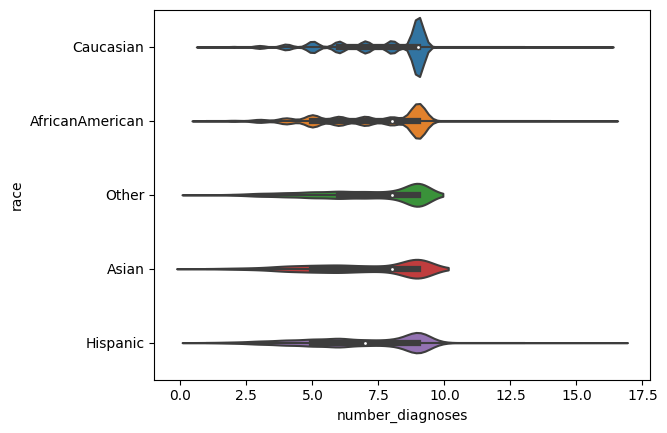

In [35]:
sns.violinplot(x="number_diagnoses", y="race", data=df2)

<Axes: xlabel='number_emergency', ylabel='race'>

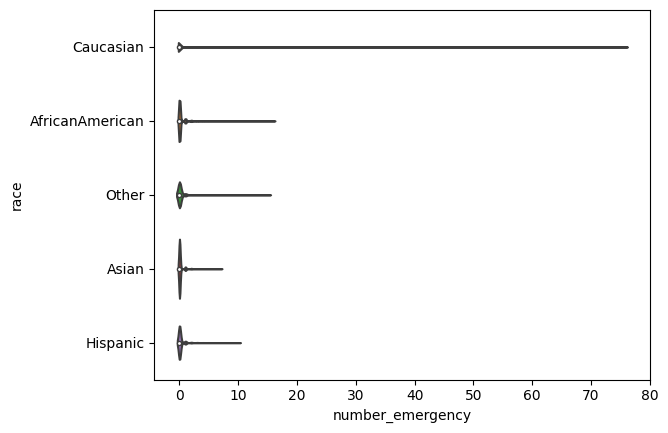

In [36]:
sns.violinplot(x="number_emergency", y="race", data=df2)

In [48]:
#above distribution shows that caucasian has right skewed distribution. Looking at summary statistics for this care indicator (number of emergency procedures)
df2.groupby(['race'])['number_emergency'].describe()

,count,mean,std,min,25%,50%,75%,max
race,,,,,,,,
AfricanAmerican,19210.0,0.261010,0.887183,0.0,0.0,0.0,0.0,16.0
Asian,641.0,0.093604,0.419046,0.0,0.0,0.0,0.0,7.0
Caucasian,76099.0,0.185679,0.954526,0.0,0.0,0.0,0.0,76.0
Hispanic,2037.0,0.228277,0.859150,0.0,0.0,0.0,0.0,10.0
Other,1506.0,0.241036,1.075089,0.0,0.0,0.0,0.0,15.0


<Axes: xlabel='number_inpatient', ylabel='race'>

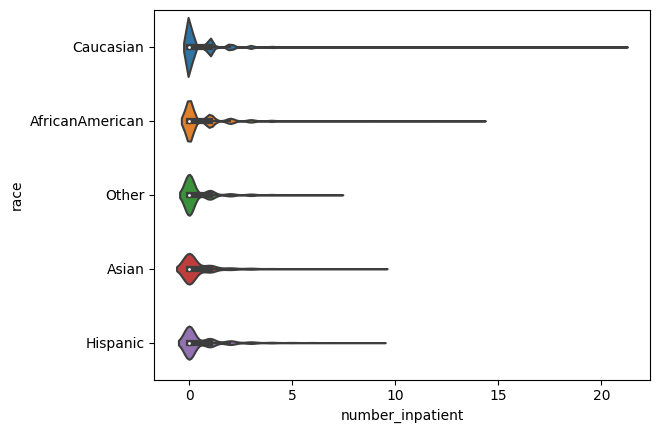

In [37]:
sns.violinplot(x="number_inpatient", y="race", data=df2)

In [49]:
#this also shows a long right tail for caucasian patients.
df2.groupby(['race'])['number_inpatient'].describe()

,count,mean,std,min,25%,50%,75%,max
race,,,,,,,,
AfricanAmerican,19210.0,0.701770,1.348496,0.0,0.0,0.0,1.0,14.0
Asian,641.0,0.482059,1.105415,0.0,0.0,0.0,1.0,9.0
Caucasian,76099.0,0.634240,1.258989,0.0,0.0,0.0,1.0,21.0
Hispanic,2037.0,0.611193,1.185635,0.0,0.0,0.0,1.0,9.0
Other,1506.0,0.454183,0.990768,0.0,0.0,0.0,1.0,7.0


OVERALL, I WAS EXPECTING TO SEE MORE OBVIOUS DIFFERENCES IN DISTRBUTIONS WHEN BROKEN OUT BY RACE.  BUT OTHER THAN THE LONG RIGHTWARD TAIL ON THE DATA FOR WHITES ON THE NUMBER OF EMERGENCY PROCEDURES (caucasian maximum was 76)AND THE NUMBER OF IN PATIENT DAYS (caucasian max was 21), THERE AREN'T ANY OBVIOUS DISCREPANCIES IN THESE DISTRIBUTIONS.  

<Axes: xlabel='time_in_hospital', ylabel='age'>

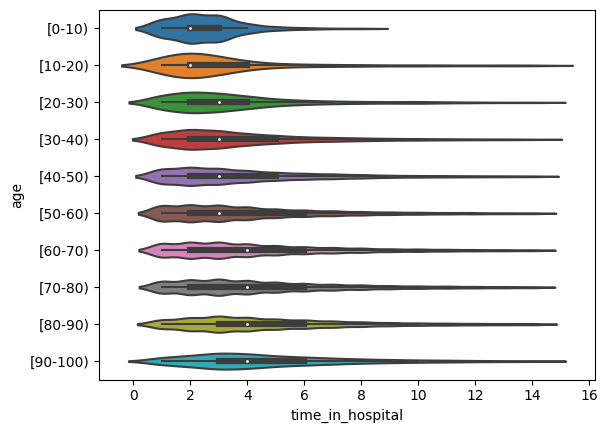

In [38]:
#going to explore whether there are any distinctions by age
sns.violinplot(x="time_in_hospital", y="age", data=df2)

In [50]:
#younger patients appear to spend less time in the hospital - summary statistics below
df2.groupby(['age'])['time_in_hospital'].describe()

,count,mean,std,min,25%,50%,75%,max
age,,,,,,,,
[0-10),161.0,2.546584,1.274511,1.0,2.0,2.0,3.0,8.0
[10-20),691.0,3.191027,2.612341,1.0,2.0,2.0,4.0,14.0
[20-30),1657.0,3.564876,2.547528,1.0,2.0,3.0,4.0,14.0
[30-40),3775.0,3.799735,2.688303,1.0,2.0,3.0,5.0,14.0
[40-50),9685.0,4.039649,2.888374,1.0,2.0,3.0,5.0,14.0
[50-60),17256.0,4.125753,2.917638,1.0,2.0,3.0,6.0,14.0
[60-70),22483.0,4.382244,3.003430,1.0,2.0,4.0,6.0,14.0
[70-80),26068.0,4.590878,3.044671,1.0,2.0,4.0,6.0,14.0
[80-90),17197.0,4.808629,3.031156,1.0,3.0,4.0,6.0,14.0


Average number of days in the hospital for the youngest patients is the lowest (2.5 days), while the oldest patients average the longest stay (4.7 days).

<Axes: xlabel='num_lab_procedures', ylabel='age'>

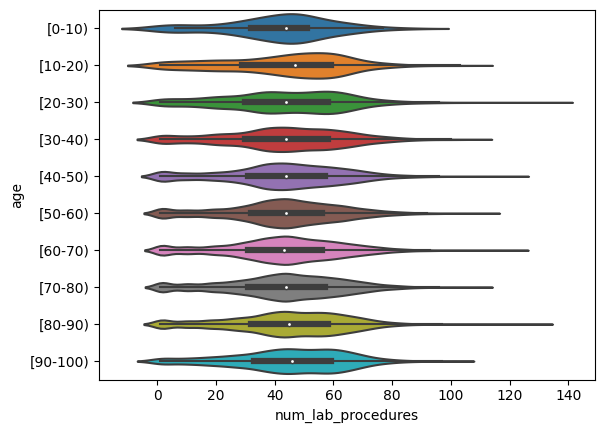

In [39]:
sns.violinplot(x="num_lab_procedures", y="age", data=df2)

In [59]:
#younger patients appear to undergo less lab procedures
df2.groupby(['age'])['num_lab_procedures'].describe()

,count,mean,std,min,25%,50%,75%,max
age,,,,,,,,
[0-10),161.0,41.012422,18.150409,1.0,32.0,44.0,51.0,86.0
[10-20),691.0,43.096961,20.556832,1.0,29.0,47.0,59.0,103.0
[20-30),1657.0,43.066385,20.611847,1.0,30.0,44.0,58.0,132.0
[30-40),3775.0,43.033642,20.475474,1.0,30.0,44.0,58.0,106.0
[40-50),9685.0,42.785958,20.074040,1.0,31.0,44.0,57.0,120.0
[50-60),17256.0,42.611961,19.538455,1.0,32.0,44.0,56.0,111.0
[60-70),22483.0,42.600632,19.638356,1.0,31.0,43.0,56.0,121.0
[70-80),26068.0,43.157396,19.542238,1.0,31.0,44.0,57.0,109.0
[80-90),17197.0,44.085015,19.587307,1.0,32.0,45.0,58.0,129.0


<Axes: xlabel='num_procedures', ylabel='age'>

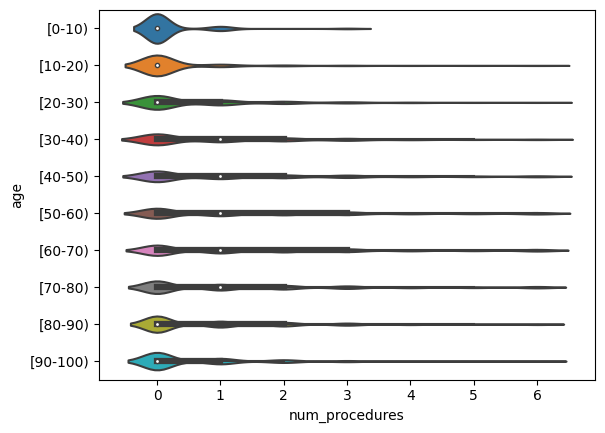

In [52]:
sns.violinplot(x="num_procedures", y="age", data=df2)

In [60]:
#younger patients (<20 years old) and oldest patients (>80 years old) median procedures is zero. But middle age patients it's at least 1 procedure
df2.groupby(['age'])['num_procedures'].describe()

,count,mean,std,min,25%,50%,75%,max
age,,,,,,,,
[0-10),161.0,0.180124,0.510982,0.0,0.0,0.0,0.0,3.0
[10-20),691.0,0.335745,0.932588,0.0,0.0,0.0,0.0,6.0
[20-30),1657.0,0.767049,1.196836,0.0,0.0,0.0,1.0,6.0
[30-40),3775.0,1.113377,1.453526,0.0,0.0,1.0,2.0,6.0
[40-50),9685.0,1.341662,1.696768,0.0,0.0,1.0,2.0,6.0
[50-60),17256.0,1.556096,1.824393,0.0,0.0,1.0,3.0,6.0
[60-70),22483.0,1.573367,1.817877,0.0,0.0,1.0,3.0,6.0
[70-80),26068.0,1.377896,1.727075,0.0,0.0,1.0,2.0,6.0
[80-90),17197.0,1.023027,1.477970,0.0,0.0,0.0,2.0,6.0


Interesting that the youngest and oldest patients average the fewest number of procedures, and middle age patients average the most procedures.

<Axes: xlabel='num_medications', ylabel='age'>

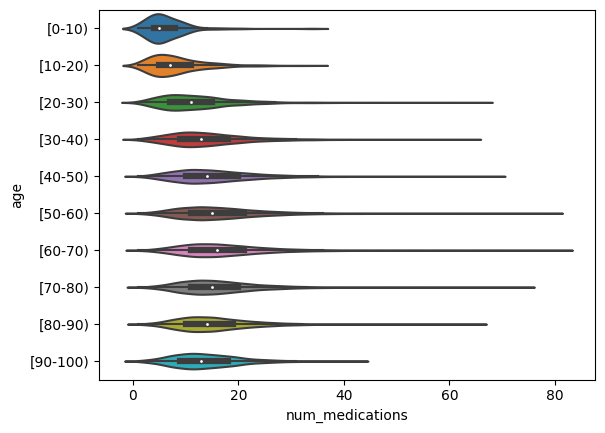

In [53]:
sns.violinplot(x="num_medications", y="age", data=df2)

In [61]:
df2.groupby(['age'])['num_medications'].describe()

,count,mean,std,min,25%,50%,75%,max
age,,,,,,,,
[0-10),161.0,6.180124,4.061847,1.0,4.0,5.0,8.0,34.0
[10-20),691.0,8.277858,5.358002,1.0,5.0,7.0,11.0,34.0
[20-30),1657.0,11.972842,6.909778,1.0,7.0,11.0,15.0,65.0
[30-40),3775.0,14.091656,7.618074,1.0,9.0,13.0,18.0,63.0
[40-50),9685.0,15.391017,7.994733,1.0,10.0,14.0,20.0,68.0
[50-60),17256.0,16.584492,8.606389,1.0,11.0,15.0,21.0,79.0
[60-70),22483.0,17.150425,8.640744,1.0,11.0,16.0,21.0,81.0
[70-80),26068.0,16.407818,8.048629,1.0,11.0,15.0,20.0,74.0
[80-90),17197.0,15.326685,7.096388,1.0,10.0,14.0,19.0,65.0


Not dissimilar from the trend with the number of procedures, the number of medications prescribed (on average) peaks for middle age patients (60-70 years old).

<Axes: xlabel='number_emergency', ylabel='age'>

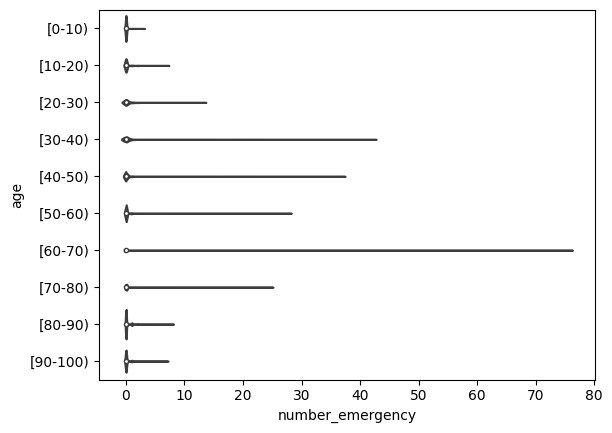

In [58]:
sns.violinplot(x="number_emergency", y="age", data=df2)

In [62]:
df2.groupby(['age'])['number_emergency'].describe()

,count,mean,std,min,25%,50%,75%,max
age,,,,,,,,
[0-10),161.0,0.031056,0.260345,0.0,0.0,0.0,0.0,3.0
[10-20),691.0,0.156295,0.619865,0.0,0.0,0.0,0.0,7.0
[20-30),1657.0,0.578153,1.456729,0.0,0.0,0.0,0.0,13.0
[30-40),3775.0,0.490331,1.943246,0.0,0.0,0.0,0.0,42.0
[40-50),9685.0,0.356840,1.374322,0.0,0.0,0.0,0.0,37.0
[50-60),17256.0,0.222473,0.866349,0.0,0.0,0.0,0.0,28.0
[60-70),22483.0,0.162434,1.088692,0.0,0.0,0.0,0.0,76.0
[70-80),26068.0,0.131080,0.504292,0.0,0.0,0.0,0.0,25.0
[80-90),17197.0,0.144269,0.473726,0.0,0.0,0.0,0.0,8.0


Overwhelming number of patients have no emergency procedures, but there are a few notable outliers where a patient will receive many (maximum was a patient 60-70 years old that had 76 procedures

<Axes: xlabel='number_inpatient', ylabel='age'>

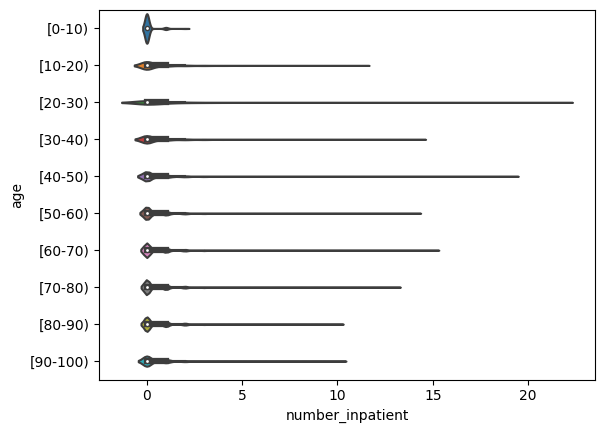

In [56]:
sns.violinplot(x="number_inpatient", y="age", data=df2)

<Axes: xlabel='number_diagnoses', ylabel='age'>

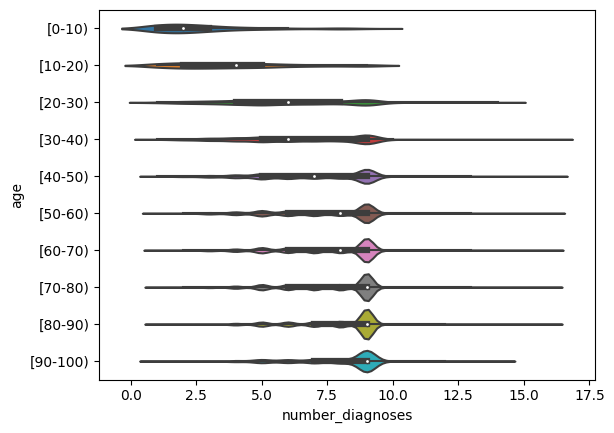

In [57]:
sns.violinplot(x="number_diagnoses", y="age", data=df2)

In [63]:
df2.groupby(['age'])['number_diagnoses'].describe()

,count,mean,std,min,25%,50%,75%,max
age,,,,,,,,
[0-10),161.0,2.695652,1.864281,1.0,1.0,2.0,3.0,9.0
[10-20),691.0,3.947902,2.265086,1.0,2.0,4.0,5.0,9.0
[20-30),1657.0,5.866626,2.328090,1.0,4.0,6.0,8.0,14.0
[30-40),3775.0,6.452980,2.223913,1.0,5.0,6.0,9.0,16.0
[40-50),9685.0,6.948787,2.070589,1.0,5.0,7.0,9.0,16.0
[50-60),17256.0,7.238584,1.964931,1.0,6.0,8.0,9.0,16.0
[60-70),22483.0,7.506427,1.862690,1.0,6.0,8.0,9.0,16.0
[70-80),26068.0,7.651795,1.764932,1.0,6.0,9.0,9.0,16.0
[80-90),17197.0,7.888702,1.635572,1.0,7.0,9.0,9.0,16.0
